# 📊 Session 2 — Student Worksheet (Pandas + Plotly)
Work in small groups. Find a CSV dataset on GitHub, load it in Colab, and adapt commands from the workbook.
Be ready to walk through your code at the end.


## Part 1 — Find a Dataset (GitHub)

In [ ]:
csv_url = "/Korea_fertility_2000-2024.csv"
csv_url

'/Korea_fertility_2000-2024.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 2 — Load & Inspect

In [ ]:
import pandas as pd

df = pd.read_csv(csv_url, encoding='latin-1')
rows, cols = df.shape
rows, cols

(144, 27)

## Part 3 — Chart development

## (1) Total Fertility Rate (2000–2024, South Korea)

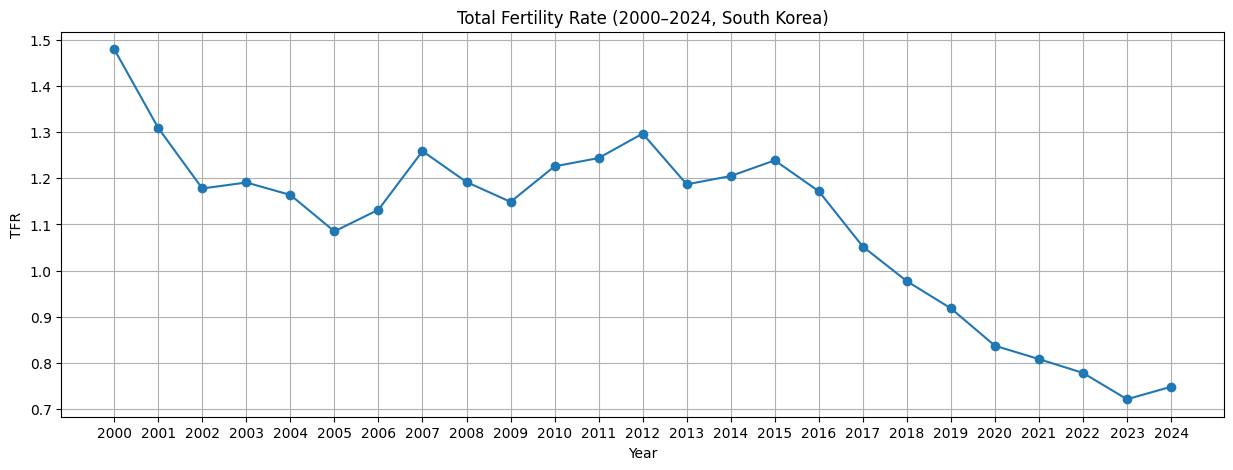

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tfr_south_korea = df[(df['category'] == 'total fertility rate') & (df['Admin regions'] == 'South Korea')].set_index('category')

years = df.columns[2:]
values = pd.to_numeric(tfr_south_korea.loc['total fertility rate', years], errors='coerce')

plt.figure(figsize=(15,5))
plt.plot(years, values, marker='o', color='tab:blue')
plt.title("Total Fertility Rate (2000–2024, South Korea)")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.grid(True)
plt.show()

## (2) Total Fertility Rate by Region (2000–2024)

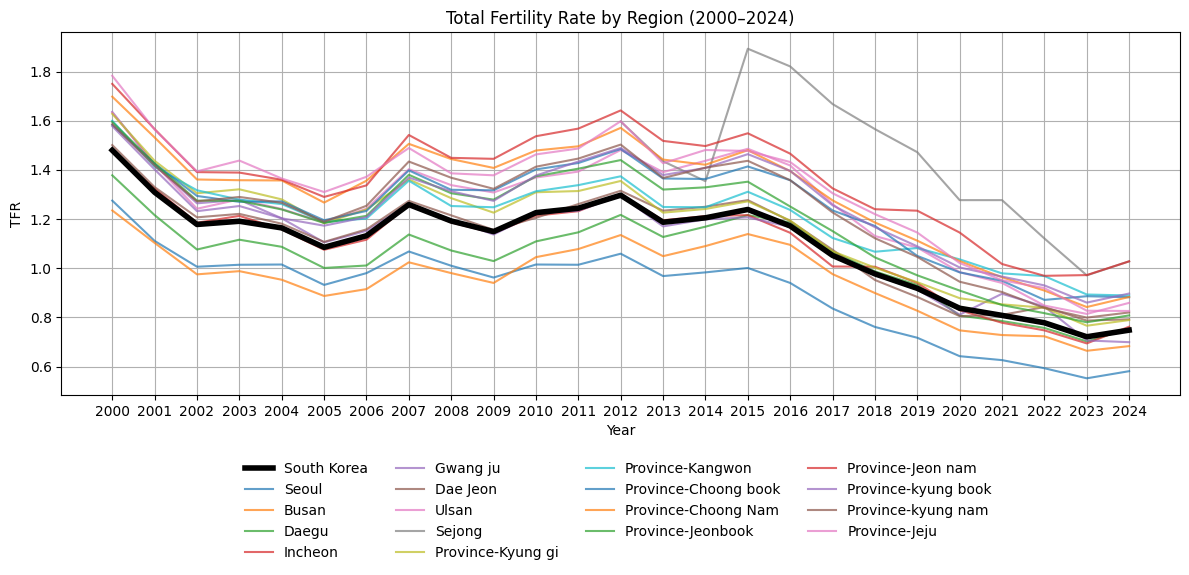

In [ ]:
region_df = df[df['category'] == 'total fertility rate']

plt.figure(figsize=(12,6))
for region in region_df['Admin regions'].unique():
    temp = region_df[region_df['Admin regions'] == region]
    y_vals = pd.to_numeric(temp.iloc[0, 2:], errors='coerce')

    # "South Korea" highlight
    if region == "South Korea":
        plt.plot(years, y_vals, label=region, color='black', linewidth=4, zorder=5)
    else:
        plt.plot(years, y_vals, label=region, linewidth=1.5, alpha=0.7)

plt.title("Total Fertility Rate by Region (2000–2024)")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False
)
plt.grid(True)
plt.tight_layout()
plt.show()


## (2)-1 Total Fertility Rate by Province Regions (2000–2024)

```



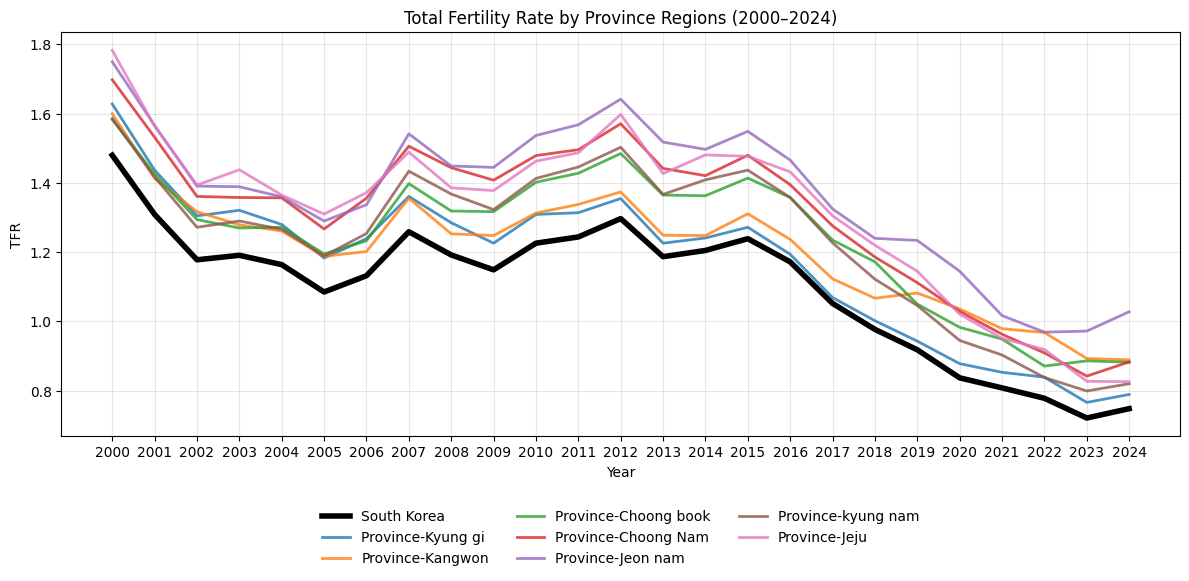

In [ ]:

# --- Define the regions you want to keep ---
selected_regions = [
    "Province-Choong book",
    "Province-Choong Nam",
    "Province-Jeju",
    "Province-Jeon nam",
    "Province-Jeonbook",
    "Province-Kangwon",
    "Province-kyung book",
    "Province-Kyung gi",
    "Province-kyung nam",
    "South Korea"
]

# --- Filter dataset ---
region_df = df[df["category"] == "total fertility rate"]
region_df = region_df[region_df["Admin regions"].isin(selected_regions)]

# --- Extract year columns (numeric only) ---
years = [c for c in df.columns if str(c).isdigit()]
years = sorted(years, key=int)

# --- Plot ---
plt.figure(figsize=(12,6))
for region in region_df["Admin regions"].unique():
    temp = region_df[region_df["Admin regions"] == region]
    y_vals = pd.to_numeric(temp.iloc[0, 2:], errors="coerce")

    # Highlight South Korea
    if region == "South Korea":
        plt.plot(years, y_vals, label=region, color="black", linewidth=4, zorder=5)
    else:
        plt.plot(years, y_vals, label=region, linewidth=2, alpha=0.8)

# --- Style ---
plt.title("Total Fertility Rate by Province Regions (2000–2024)")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## (2)-2 Total Fertility Rate by Major Cities (2000–2024)

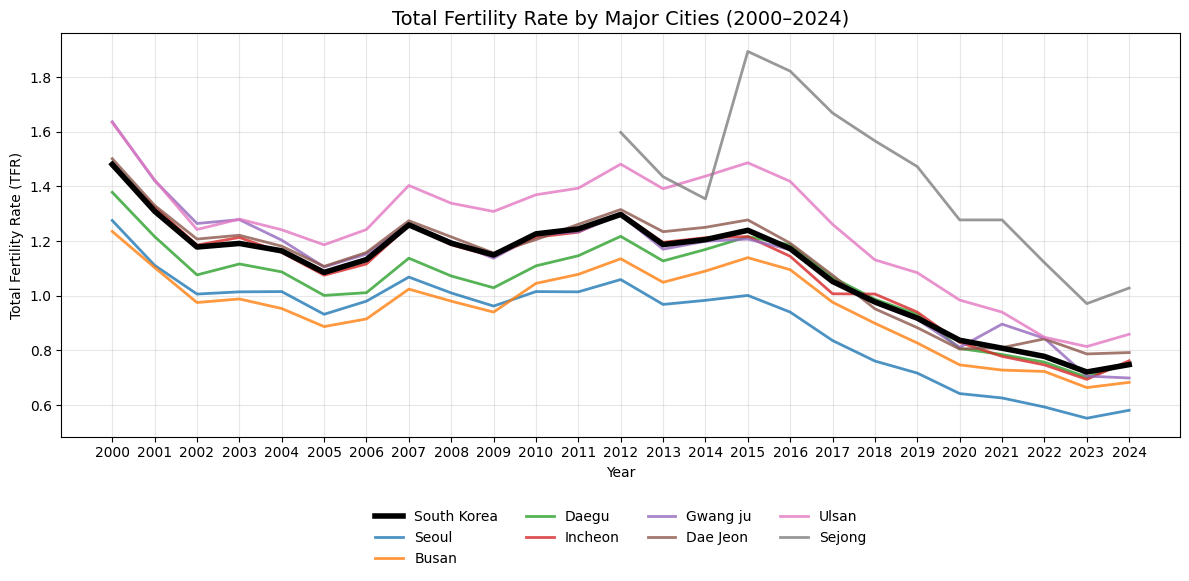

In [ ]:
# --- Define the selected city list ---
selected_regions = [
    "Ulsan",
    "South Korea",
    "Seoul",
    "Sejong",
    "Incheon",
    "Gwang ju",
    "Daegu",
    "Dae Jeon",
    "Busan"
]

# --- Filter dataset ---
region_df = df[df["category"] == "total fertility rate"]
region_df = region_df[region_df["Admin regions"].isin(selected_regions)]

# --- Extract year columns (numeric only) ---
years = [c for c in df.columns if str(c).isdigit()]
years = sorted(years, key=int)

# --- Plot ---
plt.figure(figsize=(12,6))
for region in region_df["Admin regions"].unique():
    temp = region_df[region_df["Admin regions"] == region]
    y_vals = pd.to_numeric(temp.iloc[0, 2:], errors="coerce")

    # Highlight South Korea
    if region == "South Korea":
        plt.plot(years, y_vals, label=region, color="black", linewidth=4, zorder=5)
    else:
        plt.plot(years, y_vals, label=region, linewidth=2, alpha=0.8)

# --- Style ---
plt.title("Total Fertility Rate by Major Cities (2000–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Fertility Rate (TFR)")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## (3) Age-specific Fertility Rates (2000–2024, South Korea)

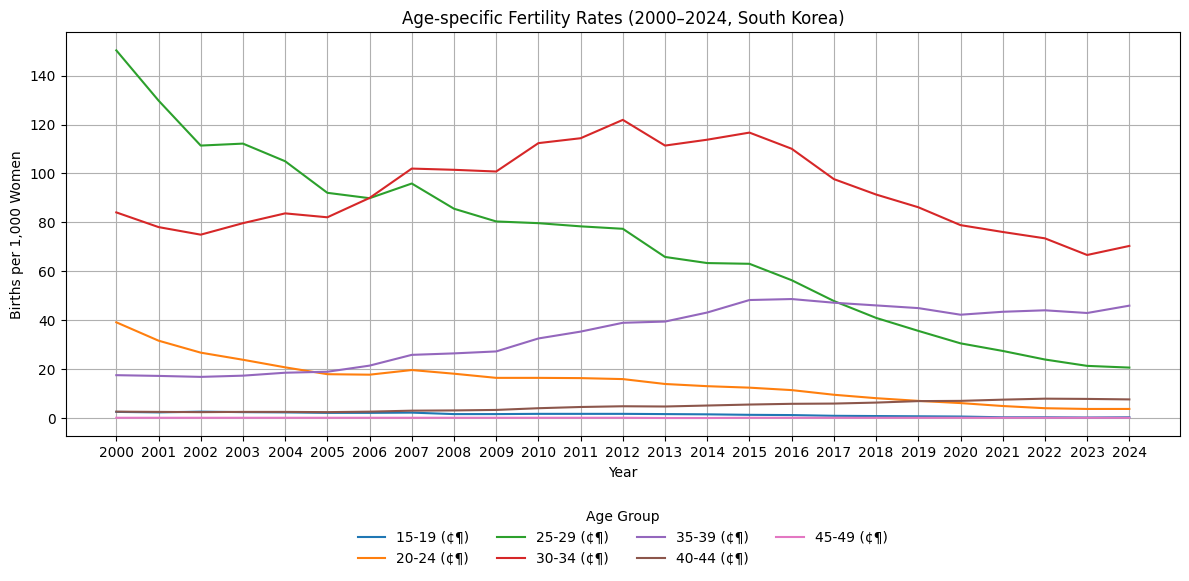

In [ ]:

age_df = df[df['category'] != 'total fertility rate']

plt.figure(figsize=(12,6))
for cat in age_df['category'].unique():
    temp = age_df[age_df['category'] == cat]
    plt.plot(years, temp.iloc[0, 2:].astype(float), label=cat)


plt.title("Age-specific Fertility Rates (2000–2024, South Korea)")
plt.xlabel("Year")
plt.ylabel("Births per 1,000 Women")
plt.legend(title="Age Group", loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


(3)-1 Age-specific Fertility Rates (2000–2024, South Korea)

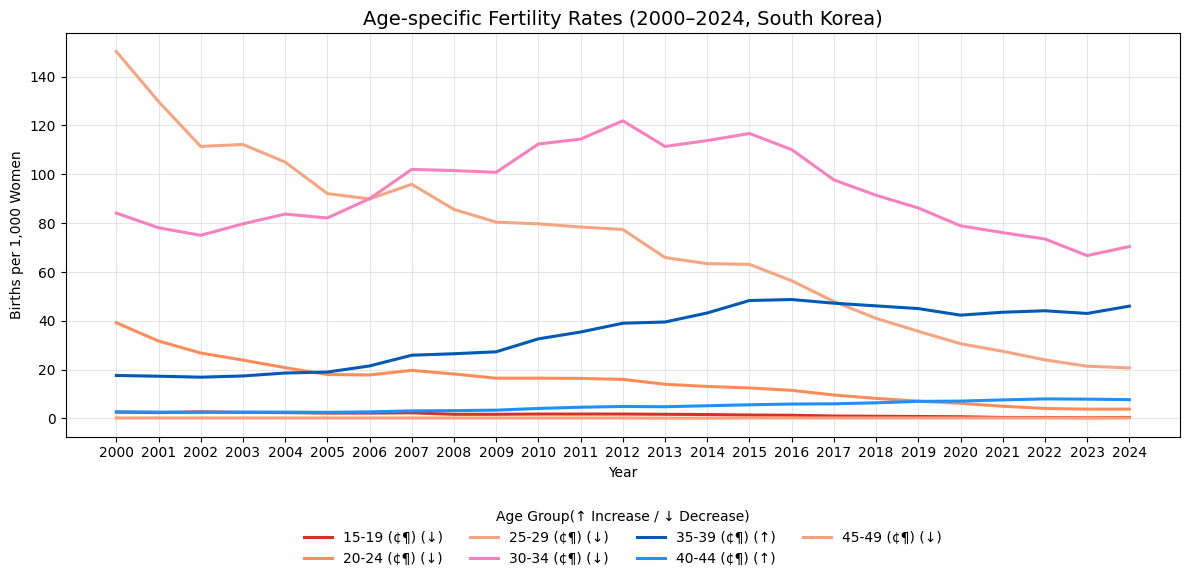

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

age_df = df[df['category'] != 'total fertility rate']
plt.figure(figsize=(12,6))

# color pallated
blue_family = ['#005AB5', '#1E90FF', '#00BFFF', '#20B2AA', '#3CB371']  # blue~green
red_family  = ['#D73027', '#FC8D59', '#F4A582', '#F781BF', '#FFA07A']  # red-orange-[ink]

# increase / decrease
increasing_colors = []
decreasing_colors = []

for cat in age_df['category'].unique():
    temp = age_df[age_df['category'] == cat]
    values = temp.iloc[0, 2:].astype(float)
    diff = values.iloc[-1] - values.iloc[0]

    # ↑ increasing age group → blue_familiy
    if diff > 0:
        color = blue_family[len(increasing_colors) % len(blue_family)]
        increasing_colors.append(cat)
    # ↓ decreasing age group→ red_familiy
    else:
        color = red_family[len(decreasing_colors) % len(red_family)]
        decreasing_colors.append(cat)

    plt.plot(years, values, label=f"{cat} ({'↑' if diff>0 else '↓'})",
             color=color, linewidth=2.2)

plt.title("Age-specific Fertility Rates (2000–2024, South Korea)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Births per 1,000 Women")
plt.legend(title="Age Group(↑ Increase / ↓ Decrease)", loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


increasing age group : 35-39, 40-44
decreasing age group : 15-19, 20-24, 25-29, 30-34, 45-49